# Use LLM-CLIP with a Fine Tuned Archaeological Image/Caption Model

[LLM-CLIP](https://github.com/simonw/llm-clip) (by Simon Willison) works extremely well out-of-the-box on a wide variety of images, but we wanted to use it on a version of CLIP that had been finetuned on several thousand archaeological photographs and their associated metadata. LLM-CLIP then makes it very convert a folder of images on your own machine into embeddings within that model space. With that done, you can search for ideas in this archaeological space and see what images in your folder turn up, or you can look for similar photographs to a query image within your data.

For more on LLM-CLIP see Simon's [blog post](https://simonwillison.net/2023/Sep/12/llm-clip-and-chat/)

For an early writeup from Shawn see [Electric Archaeology](https://electricarchaeology.ca/2023/10/10/archaeclip-or-building-a-visual-search-engine-for-archaeology/)

For an early writeup from Eric, see [Open Context](https://alexandriaarchive.org/2023/10/08/artificial-intelligence-ai-and-open-context/)

## Setup

In [ ]:
!pip install llm transformers

In [ ]:
!llm install llm-clip

In [ ]:
# you don't need to do this because we're going to grab via transformers from huggingface, but just in case you're curious:
#!git clone https://huggingface.co/sgraham/archae-ai

On your machine, zip up a folder of images you want to test. Upload them to the colab notebook (or mount your gdrive and do it that way) then unzip them:

In [ ]:
!unzip images.zip

In [ ]:
# work out where llm-clip.py is located:
!pip list -v | grep llm

llmx                             0.0.15a0              /usr/local/lib/python3.10/dist-packages pip


Use the file tray to navigate to where llm-clip is located or double click on this link: /usr/local/lib/python3.10/dist-packages/llm_clip.py; open the file and change lines 22 and 23:

```
if self._model is None:
   self._model = SentenceTransformer('clip-ViT-B-32')
```
to point to your new model, like so:

```
    def embed_batch(self, items):
        # Embeds a mix of text strings and binary images
        if self._model is None:
            self._model = SentenceTransformer('sgraham/archae-ai')
```

Hit ctrl+s to save the llm_clip.py file. (When you run the llm-clip commands below the first time, the model will be automatically downloaded from Shawn's repo on Huggingface.)

## Embedding Time

Run your folder of images through our fine-tuned clip model:

In [ ]:
!llm embed-multi photos --files images/ '*.jpg' --binary -m clip

.gitattributes: 100% 66.0/66.0 [00:00<00:00, 363kB/s]
0_CLIPModel/config.json: 100% 489/489 [00:00<00:00, 1.42MB/s]
0_CLIPModel/merges.txt: 100% 525k/525k [00:00<00:00, 8.10MB/s]
model.safetensors: 100% 605M/605M [00:15<00:00, 38.8MB/s]
0_CLIPModel/preprocessor_config.json: 100% 316/316 [00:00<00:00, 1.67MB/s]
pytorch_model.bin: 100% 605M/605M [00:17<00:00, 34.8MB/s]
0_CLIPModel/special_tokens_map.json: 100% 389/389 [00:00<00:00, 1.76MB/s]
0_CLIPModel/tokenizer_config.json: 100% 604/604 [00:00<00:00, 3.21MB/s]
0_CLIPModel/vocab.json: 100% 961k/961k [00:00<00:00, 5.22MB/s]
README.txt: 100% 8.40k/8.40k [00:00<00:00, 26.6MB/s]
config_sentence_transformers.json: 100% 116/116 [00:00<00:00, 612kB/s]
readme.md: 100% 1.81k/1.81k [00:00<00:00, 8.15MB/s]
modules.json: 100% 122/122 [00:00<00:00, 702kB/s]
2023-11-28 19:10:24.582522: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already

# Vibe Search!
Now you can search for similar ideas expressed in your images:

In [ ]:
query = 'lying down after a big meal'
!llm similar photos -c "{query}"


2023-11-27 20:34:03.225629: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 20:34:03.225722: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 20:34:03.225765: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 20:34:04.974795: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
{"id": "pompi.9.5.jpg", "score": 0.2935780169117778, "content": null, "metadata": null}
{"id": "5343210.jpg", "score": 0.25744371849625625, "content": null, "metadata": null}
{"id": "DP210405.jpg", "score": 0.2103357488661646, "content": 

# Visually Similar!

Or you can look for visually similar photos

In [ ]:
query = "smalltest/DT223240.jpg"
!llm similar photos -i "{query}" --binary
# the first result will be the image itself

2023-11-27 19:44:17.543079: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 19:44:17.543156: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 19:44:17.543191: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 19:44:19.152661: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
{"id": "DT223240.jpg", "score": 0.9999999999998661, "content": null, "metadata": null}
{"id": "DP-19802-001.jpg", "score": 0.49527387138613643, "content": null, "metadata": null}
{"id": "5343210.jpg", "score": 0.37832348010084527, "conten

## Let's make a nice display function

The functions below take the commands from above and return the first three results. Then they display the image, image name, and the score.

Note for your own folder of images, you'll need to change lines 26 and 54 to replace 'smalltest' with your own folder's name.

In [ ]:
## a nice helper function for displaying top 3 similar images:
import json
from IPython.display import Image, display
from subprocess import getoutput

def vibe_search(query):
    # Run the command and capture its output
    output = getoutput(f"llm similar photos -c \"{query}\"")

    # Split the output by line to process individual JSON objects
    lines = output.split('\n')

    # Filter lines to keep only the ones starting with '{"id":'
    json_lines = [line for line in lines if line.startswith('{"id":')]

    # Display the first three images from the JSON lines
    for json_line in json_lines[:3]:  # Limit the loop to only the first three results
        try:
            # Parse the JSON line
            result = json.loads(json_line)
            image_id = result['id']
            score = result['score']

            # Display the image and its score
            print(f"Image: {image_id} \n Score: {score}")
            image_path = f'smalltest/{image_id}' #YOU NEED TO CHANGE THIS IF YOUR DIRECTORY IS DIFFERENT
            display(Image(filename=image_path))

        except json.JSONDecodeError as e:
            print(f"Failed to parse JSON response: {e}")
        except FileNotFoundError as fe:
            print(f"Failed to find image file: {fe}")

def visually_similar(query):
    # Run the command and capture its output
    output = getoutput(f"llm similar photos -i \"{query}\" --binary")

    # Split the output by line to process individual JSON objects
    lines = output.split('\n')

    # Filter lines to keep only the ones starting with '{"id":'
    json_lines = [line for line in lines if line.startswith('{"id":')]

    # Display the first three images from the JSON lines
    for json_line in json_lines[:3]:  # Limit the loop to only the first three results
        try:
            # Parse the JSON line
            result = json.loads(json_line)
            image_id = result['id']
            score = result['score']

            # Display the image and its score
            print(f"Image: {image_id} \n Score: {score}")
            image_path = f'smalltest/{image_id}' #YOU NEED TO CHANGE THIS IF YOUR DIRECTORY IS DIFFERENT
            display(Image(filename=image_path))

        except json.JSONDecodeError as e:
            print(f"Failed to parse JSON response: {e}")
        except FileNotFoundError as fe:
            print(f"Failed to find image file: {fe}")

Image: pompi.9.5.jpg 
 Score: 0.2935780169117778


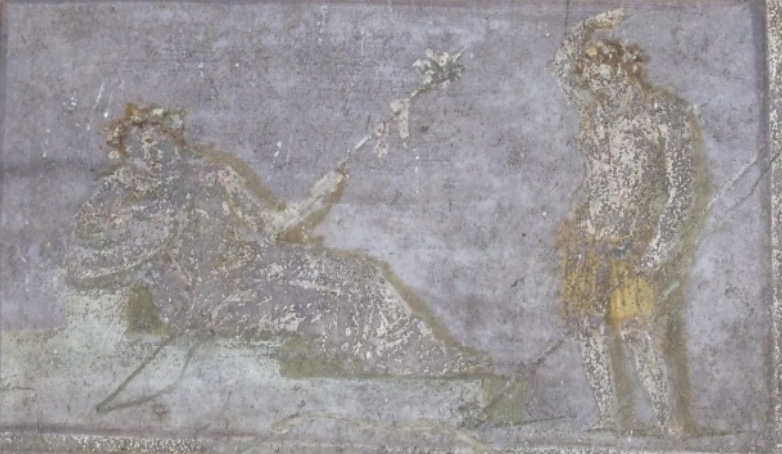

Image: 5343210.jpg 
 Score: 0.25744371849625625


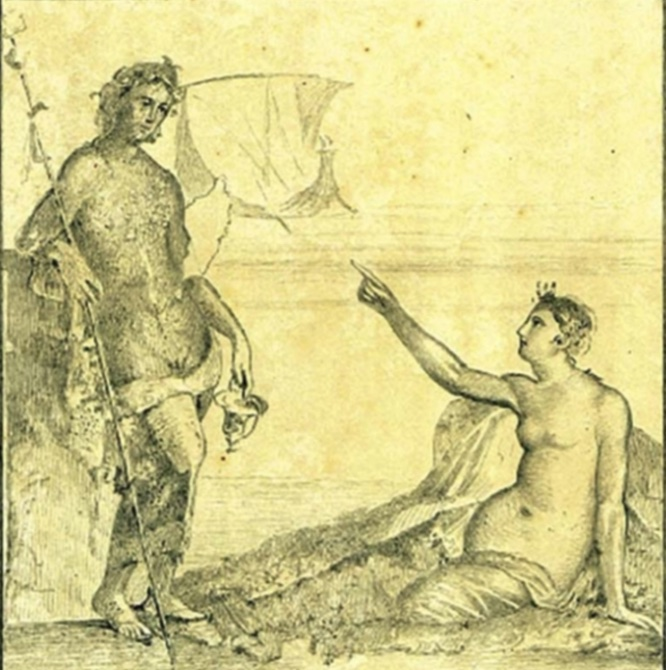

Image: DP210405.jpg 
 Score: 0.2103357488661646


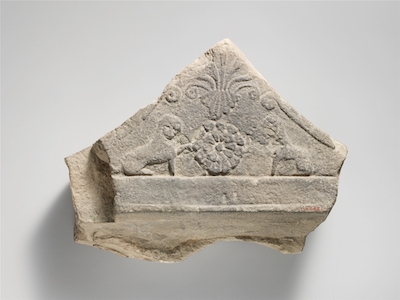

In [ ]:
# now use it!
query = 'lying down after a big meal'
vibe_search(query)

Image: DP110600.jpg 
 Score: 0.9999999999998196


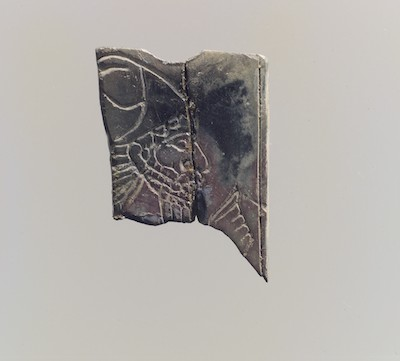

Image: DP-15115-001.jpg 
 Score: 0.5479377449399585


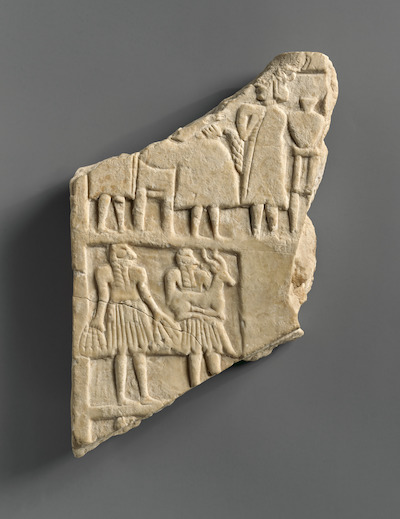

Image: DP210405.jpg 
 Score: 0.5360112879642795


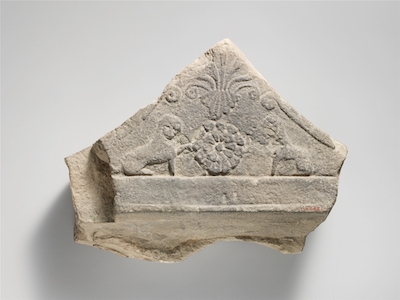

In [ ]:
visually_similar("smalltest/DP110600.jpg")